<a href="https://colab.research.google.com/github/ejnunn/GAN_Research/blob/main/notebooks/Face_Cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare Environment

In [24]:
import cv2
from cv2 import imread
from google.colab.patches import cv2_imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import rectangle
from cv2 import CascadeClassifier

!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

import os

# CV2 Version

In [8]:
# example of face detection with opencv cascade classifier

# load the photograph
test_img = 'drive/MyDrive/images/Allison_and_Eric.jpg'
pixels = imread(test_img)
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	print(box)

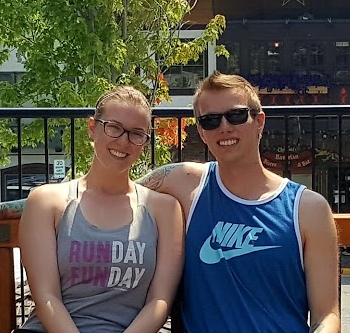

In [9]:
# plot photo with detected faces using opencv cascade classifier

# load the photograph
pixels = imread(test_img)
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
cv2_imshow(pixels)

# MTCNN Version

In [10]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 11.9MB/s 


In [12]:
# face detection with mtcnn on a photograph

# load image from file
filename = test_img
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

{'box': [198, 88, 57, 71], 'confidence': 0.9998451471328735, 'keypoints': {'left_eye': (210, 118), 'right_eye': (236, 114), 'nose': (224, 130), 'mouth_left': (217, 143), 'mouth_right': (240, 139)}}
{'box': [95, 99, 52, 71], 'confidence': 0.9981676340103149, 'keypoints': {'left_eye': (115, 126), 'right_eye': (137, 132), 'nose': (124, 146), 'mouth_left': (107, 148), 'mouth_right': (130, 153)}}


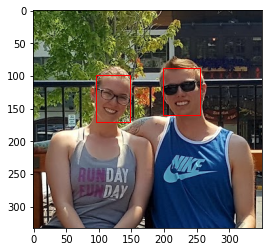

In [17]:
# face detection with mtcnn on a photograph


# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = plt.imread(filename)
	# plot the image
	plt.imshow(data)
	# get the context for drawing boxes
	ax = plt.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	plt.show()

filename = test_img
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

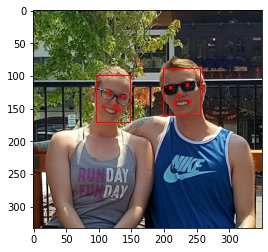

In [22]:
# face detection with mtcnn on a photograph


# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = plt.imread(filename)
	# plot the image
	plt.imshow(data)
	# get the context for drawing boxes
	ax = plt.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	plt.show()

filename = test_img
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [ ]:
# extract and plot each detected face in a photograph


# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = plt.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		plt.subplot(1, len(result_list), i+1)
		plt.axis('off')
		# plot face
		plt.imshow(data[y1:y2, x1:x2])
	# show the plot
	plt.show()

# save each face to a separate file
def save_faces(filename, result_list):
  # load the image
  data = plt.imread(filename)

  img_name = os.path.splitext(filename)[0]
  img_ext = os.path.splitext(filename)[1]

  for i in range(len(result_list)):
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height

    face = data[y1:y2, x1:x2]

    plt.imsave(img_name + str(i) + img_ext, face)

  return


filename = test_img
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
save_faces(filename, faces)

## Helper function to save mouths



In [ ]:
from numpy import mean

# draw an image with detected objects
def save_mouth(face_dir, mouth_dir, filename, result_list):
  # load the image
  data = plt.imread(face_dir + filename)
  # get the context for drawing boxes
  ax = plt.gca()
  
  for i in range(len(result_list)):
    result = result_list[i]
    # get square coordinates for mouth area
    x1 = result['keypoints']['mouth_left'][0]
    x2 = result['keypoints']['mouth_right'][0]
    height = x2 - x1
    y = int(mean([result['keypoints']['mouth_left'][1], result['keypoints']['mouth_right'][1]]))
    y1 = y - height//2
    y2 = y + height//2
    mouth = data[y1:y2, x1:x2]
    # save the image of the mouth
    name, ext = os.path.splitext(filename)
    plt.imsave(mouth_dir + name + "_" + str(i) + ext, mouth)
  return

# Convert Faces to Mouths

In [ ]:
import pandas as pd

In [ ]:
## Create two groups of image files, smiling and not smiling ##

# Create dataframe to sort CelebA images
img_dir_celeba = '/content/drive/MyDrive/CycleGAN/CycleGAN Images/CelebA/'
attr_filename = 'list_attr_celeba.txt'

df = pd.read_csv(img_dir_celeba + attr_filename, skiprows=1, delim_whitespace=True)
df = df.reset_index()
df.rename(columns={'index': 'filename'}, inplace=True)

# Lists of smiling and non-smiling image filenames
smiling_list = list(df[['filename']].loc[df['Smiling'] == 1]['filename'])
not_smiling_list = list(df[['filename']].loc[df['Smiling'] == -1]['filename'])

In [ ]:
import shutil
## Unzip images and move files into the correct category ##

# Unzip images from drive and store in current directory
!unzip -q /content/drive/MyDrive/CycleGAN/CycleGAN\ Images/CelebA/img_align_celeba.zip

# Create training A and B subdirectories
!mkdir img_align_celeba/trainA
!mkdir img_align_celeba/trainB

# Move images into correct subdirectory
source_dir = 'img_align_celeba/'
destination_dir = 'img_align_celeba/trainA'
for img in smiling_list:
  shutil.move(source_dir + img, destination_dir)

source_dir = 'img_align_celeba/'
destination_dir = 'img_align_celeba/trainB'
for img in not_smiling_list:
  shutil.move(source_dir + img, destination_dir)
print('images loaded successfully!')

## Convert all images from faces to mouths

Save to correct diretory

In [ ]:
def convert_from_face_to_mouth(face_dir, mouth_dir, limit=10000):
  # for each face image
  # crop the mouth
  # save to new directory
  detector = MTCNN()
  face_list = os.listdir(face_dir)
  if len(face_list) > limit:
    face_list = face_list[:limit]
  for filename in face_list:
    try:
      face_path = face_dir + filename
      pixels = plt.imread(face_path)
      faces = detector.detect_faces(pixels)
      save_mouth(face_dir, mouth_dir, filename, faces)
    except:
      continue

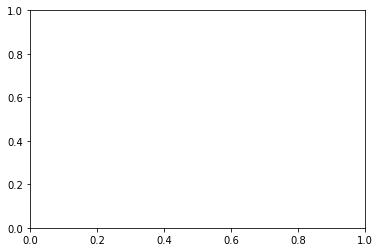

In [ ]:
train_set = 'trainB/'
face_dir = 'img_align_celeba/'
mouth_dir = 'drive/MyDrive/CycleGAN/CycleGAN Images/mouths/'
convert_from_face_to_mouth(face_dir+train_set, mouth_dir+train_set)

In [ ]:
print(len(os.listdir(mouth_dir+'trainA')))
print(len(os.listdir(mouth_dir+'trainB')))

16753
10116


## Compress mouth images into zip file for storage

In [ ]:
!zip -r smile.zip drive/MyDrive/CycleGAN/CycleGAN\ Images/mouths/trainA/
!zip -r not_smile.zip drive/MyDrive/CycleGAN/CycleGAN\ Images/mouths/trainB/

In [ ]:
# !mv smile.zip drive/MyDrive/CycleGAN/CycleGAN\ Images/mouths
!mv not_smile.zip drive/MyDrive/CycleGAN/CycleGAN\ Images/mouths